<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [126]:
%%capture

import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np

import spacy
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

from bs4 import BeautifulSoup

from collections import Counter
!pip install squarify
import squarify
import matplotlib.pyplot as plt

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [99]:
!git clone https://github.com/ilyanovak/DS-Unit-4-Sprint-1-NLP.git
job_listings = pd.read_csv('/content/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv',
                           usecols=['description', 'title'])
job_listings.head()

fatal: destination path 'DS-Unit-4-Sprint-1-NLP' already exists and is not an empty directory.


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [100]:
descripion_text = pd.Series()
for i in range(job_listings.shape[0]):
    soup = BeautifulSoup(job_listings.loc[i]['description'], 'html.parser')
    text = soup.get_text()
    descripion_text.loc[i] = text

job_listings['descripion_text'] = descripion_text
job_listings['descripion_text']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: descripion_text, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [101]:
def my_tokenizer(doc):
    doc = nlp(doc)
    lemmas = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
            lemmas.append(re.sub('[^a-zA-Z]', '', str(token.lemma_)).lower())
    return lemmas

In [102]:
description_lemmas = pd.Series()
for i in range(job_listings.shape[0]):
    description_lemmas.loc[i] = my_tokenizer(job_listings.loc[i]['descripion_text'])

job_listings['descripion_lemmas'] = description_lemmas
job_listings['descripion_lemmas']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0      [bjob, requirementsnconceptual, understanding,...
1      [bjob, descriptionnna, data, scientist, , help...
2      [bas, data, scientist, work, consult, business...
3      [b, , , monthcontractunder, general, supervisi...
4      [blocation, usa, xexx, multiple, locationsn, ,...
                             ...                        
421    [babout, usnwant, fantastic, fun, startup, tha...
422    [binternshipat, uber, ignite, opportunity, set...
423    [b, , , yeara, million, people, year, die, car...
424    [bsenior, data, scientistnjob, descriptionnnab...
425    [bcerner, intelligence, new, innovative, organ...
Name: descripion_lemmas, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [104]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000, tokenizer=my_tokenizer)
dense_matrix = vectorizer.fit_transform(job_listings['descripion_text']).todense()
word_counts_matrix = pd.DataFrame(columns=vectorizer.get_feature_names(), data=dense_matrix)
word_counts_matrix.head()

,,ability,able,academic,accelerate,accept,access,accommodation,account,accuracy,accurate,achieve,acquisition,act,action,actionable,activity,ad,add,addition,additional,address,adoption,advance,advanced,advantage,advertising,affirmative,age,agency,agile,ai,aim,algorithm,algorithmic,allow,alongside,amazon,americas,analysis,...,vendor,venture,verbal,verify,veteran,video,view,vision,visit,visual,visualization,visualize,voice,volume,walmart,want,warehouse,way,web,week,welcome,wellness,wexexxre,wide,work,workflow,workforce,working,workplace,world,worldwide,worldxexxs,write,writing,xexx,year,yearsxexx,york,youll,youxexxll
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4,0,0,0,0,2,0,0,2,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


## 4) Visualize the most common word counts

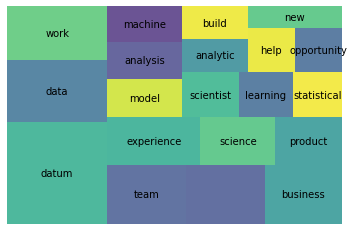

In [122]:
word_counts = Counter()
job_listings['descripion_lemmas'].apply(lambda x: word_counts.update(x))
word_counts_top20 = pd.DataFrame(columns=['word', 'count'], data=word_counts.most_common(20))

squarify.plot(sizes=word_counts_top20['count'], label=word_counts_top20['word'], alpha=.8 );
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [130]:
tfidfVectorizer = TfidfVectorizer(stop_words='english', max_features=5000, tokenizer=my_tokenizer)
tfidf_vocab = tfidfVectorizer.fit_transform(job_listings['descripion_text'])
dtm_tfidf = pd.DataFrame(columns=tfidfVectorizer.get_feature_names(), data=tfidf_vocab.todense())
dtm_tfidf.head()

,,aa,ab,abernathy,abilitiesnproblem,ability,able,absence,absolutely,abstract,abundant,academic,accelerate,accept,access,accessibility,accessible,accommodate,accommodation,accomplish,accomplishment,accord,accordance,according,account,accountability,accountable,accounting,accredit,accredited,accuracy,accurate,accurately,achieve,achievement,acquire,acquisition,act,action,actionable,...,yeara,yearcollect,yeardescriptionnchesapeake,yearn,yearnnyou,yearntelework,yearnyou,years,yearsnnwe,yearsnrequirementsnxcxbb,yearsnsick,yearsummarynabout,yearsxexx,yearthe,yes,yeti,york,youll,youn,young,younnabout,younnour,younnthe,younnwe,younnyou,younthrive,younyou,youre,youve,youxexxd,youxexxll,youxexxre,youxexxve,yrs,zero,zeus,zf,zfxexxs,zillow,zuckerberg
0,0.041984,0.0,0.0,0.0,0.0,0.063582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.056995,0.0,0.0,0.0,0.0,0.028772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084434,0.0,0.0,0.0,0.0,0.0,0.0,0.055261,0.0,0.0,0.0,0.0,0.0,0.0,0.064344,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.127221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.159389,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055108,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111397,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [134]:
model = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
model.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [163]:
ideal_job = ['''I would like a position in data science where I am in charge of 
managing the data pipeline while also offering opportunities to practice machine 
learning, with particular interest in simulation''']

ideal_job_sparse = tfidfVectorizer.transform(ideal_job)
model.kneighbors(ideal_job_sparse.todense())

(array([[1.30560431, 1.30727657, 1.30916206, 1.31076925, 1.31678738]]),
 array([[261, 359, 354,  71, 217]]))

In [168]:
job_listings.loc[[261, 359, 354, 71, 217], ['title', 'descripion_text']]

,title,descripion_text
261,Data Science Engineer,"b'The Data Science Engineer, Mintel Futures is..."
359,Sr. Data Scientist – Data for Insights Practice,b'Maximizing our potential as a learning organ...
354,Data Scientist,"b""The challenge\nAdobe\xe2\x80\x99s Creative C..."
71,Data Scientist,b'The Data Scientist will be responsible for m...
217,Senior Business Intelligence Data Engineer,b'Senior Business Intelligence Data Engineer\n...


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 